In [51]:
# comparison.ipynb
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout,Input
import matplotlib.pyplot as plt

In [31]:
import os

# Load historical data
data_folder = "data//historical"
excel_files = [
    file for file in os.listdir(data_folder)if file.endswith("xlsx")]

all_stocks = {}

for file in excel_files:
    file_path = os.path.join(data_folder, file)
    stock_name = os.path.splitext(file)[0]
    df = pd.read_excel(file_path)
    all_stocks[stock_name] = df

# Display sample of each stock
for stock, data in all_stocks.items():
    print(f"\n--- {stock} ---")
    print(data.head())


--- aclbsl ---
   #   Date      LTP  % Change    High     Low     Open  Qty.   Turnover
0  1  45805  1075.19     -0.34  1080.0  1040.2  1057.40  1787  1895715.7
1  2  45804  1078.91     -1.92  1100.0  1078.0  1100.00  2166  2337817.3
2  3  45803  1100.00     -0.74  1152.0  1100.0  1130.00  3991  4438106.7
3  4  45802  1108.15      2.58  1123.0  1080.0  1080.33  6336  7049257.9
4  5  45799  1080.33      2.89  1084.0  1034.0  1050.00  3580  3848346.6

--- adbl ---
   #   Date     LTP  % Change   High    Low   Open   Qty.    Turnover
0  1  45805  299.60      1.75  300.0  291.8  293.0  49484  14693755.4
1  2  45804  294.44     -0.88  296.0  290.0  295.0  37980  11143808.2
2  3  45803  297.05      0.70  303.0  297.0  300.8  56707  16946564.2
3  4  45802  294.98     -0.59  300.0  294.1  300.0  29709   8816051.4
4  5  45799  296.73      2.57  303.0  284.0  290.0  59233  17531706.8

--- ahl ---
   #   Date     LTP  % Change   High    Low   Open   Qty.   Turnover
0  1  45805  652.42     -1.76 

In [55]:

# Define LSTM model
lstm_model = Sequential([
    Input(shape=(X.shape[1], 1)),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predict
y_train_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_train))
y_test_pred_lstm = scaler.inverse_transform(lstm_model.predict(X_test))
y_train_true_lstm = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
train_mse_lstm = mean_squared_error(y_train_true_lstm, y_train_pred_lstm)
test_mse_lstm = mean_squared_error(y_test_true_lstm, y_test_pred_lstm)
train_r2_lstm = r2_score(y_train_true_lstm, y_train_pred_lstm)
test_r2_lstm = r2_score(y_test_true_lstm, y_test_pred_lstm)

print("\nLSTM Model Performance:")
print(f"Training MSE: {train_mse_lstm:.4f}")
print(f"Testing MSE: {test_mse_lstm:.4f}")
print(f"Training R²: {train_r2_lstm:.4f}")
print(f"Testing R²: {test_r2_lstm:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

LSTM Model Performance:
Training MSE: 261.0025
Testing MSE: 70.9954
Training R²: 0.9575
Testing R²: 0.5109


In [57]:

# Define GRU model
gru_model = Sequential([
    Input(shape=(X.shape[1], 1)),
    GRU(50),
    Dropout(0.2),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU model
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Predict
y_train_pred_gru = scaler.inverse_transform(gru_model.predict(X_train))
y_test_pred_gru = scaler.inverse_transform(gru_model.predict(X_test))
y_train_true_gru = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_gru = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
train_mse_gru = mean_squared_error(y_train_true_gru, y_train_pred_gru)
test_mse_gru = mean_squared_error(y_test_true_gru, y_test_pred_gru)
train_r2_gru = r2_score(y_train_true_gru, y_train_pred_gru)
test_r2_gru = r2_score(y_test_true_gru, y_test_pred_gru)

print("\nGRU Model Performance:")
print(f"Training MSE: {train_mse_gru:.4f}")
print(f"Testing MSE: {test_mse_gru:.4f}")
print(f"Training R²: {train_r2_gru:.4f}")
print(f"Testing R²: {test_r2_gru:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step

GRU Model Performance:
Training MSE: 149.7989
Testing MSE: 47.7759
Training R²: 0.9756
Testing R²: 0.6708


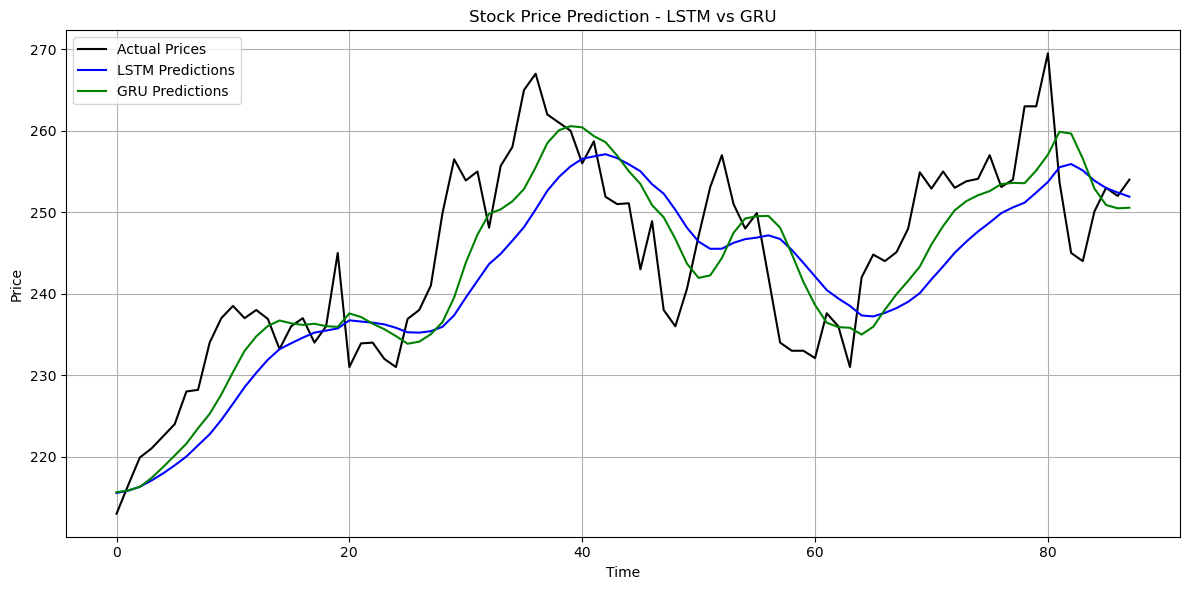

In [59]:

# Flatten arrays for plotting
y_test_true = y_test_true_lstm.flatten()  # same as y_test_true_gru
y_pred_lstm = y_test_pred_lstm.flatten()
y_pred_gru = y_test_pred_gru.flatten()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_true, label='Actual Prices', color='black')
plt.plot(y_pred_lstm, label='LSTM Predictions', color='blue')
plt.plot(y_pred_gru, label='GRU Predictions', color='green')
plt.title('Stock Price Prediction - LSTM vs GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


